#### Environment setup instuctions
```
conda create --name onebox python=3.10
conda activate onebox
pip install matplotlib
pip install numpy
pip install git+git@github.com:NeuralEnsemble/python-neo.git
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neo

In [2]:
data_path = 'E:\\Dartmouth College Dropbox\\Manish Mohapatra\\NSB2025\\M288-R-test-2025-07-09_g1'

In [3]:
reader = neo.rawio.SpikeGLXRawIO(dirname=data_path)
reader.parse_header()
print(reader)

SpikeGLXRawIO: E:\Dartmouth College Dropbox\Manish Mohapatra\NSB2025\M288-R-test-2025-07-09_g1
nb_block: 1
nb_segment:  [1]
signal_streams: [obx0 (chans: 4), obx0-SYNC (chans: 1)]
signal_channels: [XA0, XA1, XA2, XD0, SY0]
spike_channels: []
event_channels: []



In [4]:
signal_channels = reader.get_analogsignal_chunk(
    block_index=0,seg_index=0,stream_index=0)
sync_channel = reader.get_analogsignal_chunk(
    block_index=0,seg_index=0,stream_index=1)
print(signal_channels.shape, sync_channel.shape)

(4074982, 4) (4074982, 1)


In [5]:
t_start = reader.segment_t_start(block_index=0, seg_index=0)
t_stop = reader.segment_t_stop(block_index=0, seg_index=0)
sample_rate = reader.get_signal_sampling_rate(stream_index=0)
tvec = np.arange(t_start, t_stop, 1/sample_rate)
tvec.shape

(4074982,)

```

#### Channel mappings
```
signal_channels[:,0] : XA0
signal_channels[:,1] : XA1
signal_channels[:,2] : XA2
signal_channels[:,3] : XA3
sync_channel : OBX_Sync_channel

```

#### Code to plot 

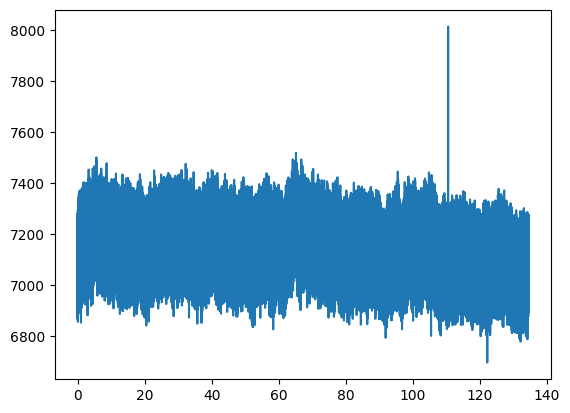

In [6]:
plt.plot(tvec, signal_channels[:,2], label='XA2')
plt.show()